# Exercise 1.9

Let $X$ be a *Pareto* random variable (rv) with parameters $\beta>0$ and $\theta>0$ and therefore with probability density function (pdf) as follows:
$$f_X(x\,|\,\beta,\theta) \,=\,\frac{\beta \theta^{\beta}}{x^{\beta+1}}\mathbb{1}_{\{x\,\geq\,\theta\}}$$

Consider a portfolio of 1-year term property and casualty insurance, under the collective risk model:

$$S \,=\, Y_1\,+\,\cdots\,+\,Y_N$$

where the *frequency* is a rv $N:=\max\{n\in\{0,1,\ldots\}: n\leq X-\theta\}$ and the conditional *severity* per claim is given by $Y\,|\,N=n\sim\text{Pareto}(2+\frac{1}{n}\,,\,\delta)$ for $n\geq 1.$ 
Calculate or estimate expected value, variance, median and $\text{VaR}_{0.995}$ of $S$ and $S\,|\,S>0,$ with parameter values $\beta=3, \theta=1=\delta.$

In [1]:
using Distributions, Statistics, Plots

In [2]:
function simulateCRM(; β = 3.0, θ = 1.0, δ = 1.0, m = 1_000_000)
    S = zeros(m)
    N = Int.(floor.(rand(Pareto(β, θ), m) .- θ)) # m = number of simulations
    iN = findall(N .≥ 1)  # positions in N such that N ≥ 1
    Y = zeros(0)
    for i ∈ iN
        Yi = rand(Pareto(2 + 1/N[i], δ), N[i])
        S[i] = sum(Yi)
        append!(Y, Yi)
    end
    println("P(S = 0) = ", 1 - sum(S .> 0)/m)
    ES, VS, MS, VaRS = mean(S), var(S), median(S), quantile(S, 0.995)
    return [S, ES, VS, MS, VaRS, N, Y]
end

simulateCRM (generic function with 1 method)

### Calculations about $S$

In [3]:
@time sim = simulateCRM(m = 1_000_000)
println("E(S) = ", sim[2], "   V(S) = ", sim[3])
println("M(S) = ", sim[4], "   VaR(0.995) = ", sim[5])
println("range = [ ", minimum(sim[1]), " , ", maximum(sim[1]), " ]")

P(S = 0) = 0.87503
  0.122357 seconds (190.06 k allocations: 54.070 MiB, 11.10% gc time, 53.98% compilation time)
E(S) = 0.33541051822207296   V(S) = 2.8940613284351357
M(S) = 0.0   VaR(0.995) = 8.61758239225741


range = [ 0.0 , 710.1915279527121 ]


In [4]:
meanN = mean(sim[6])
meanY = mean(sim[7])
meanN, meanY, meanN * meanY, length(sim[6]), length(sim[7])

(0.203331, 1.6495788552757473, 0.335410518222073, 1000000, 203331)

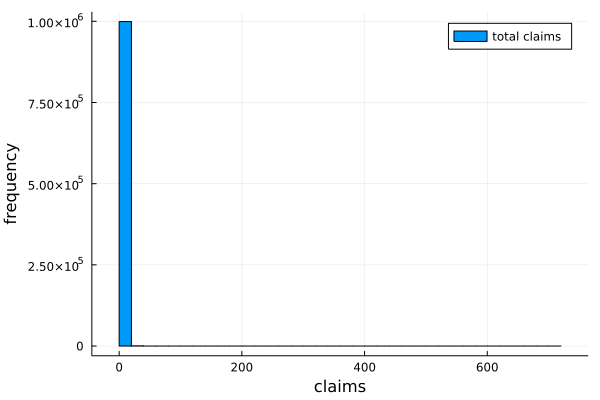

In [7]:
histogram(sim[1], label = "total claims", bins = 50)
xaxis!("claims")
yaxis!("frequency")

### Calculations about $S\,|\,S>0$

In [8]:
claims = sim[1][findall(sim[1] .> 0)]
println("E(S | S > 0) = ", mean(claims), "   V(S | S > 0) = ", var(claims))
println("M(S | S > 0) = ", median(claims), "   VaR(S | S > 0) = ", quantile(claims, 0.995))
println("range = [ ", minimum(claims), " , ", maximum(claims), " ]")

E(S | S > 0) = 2.6839282885658386   V(S | S > 0) = 16.854906992686644
M(S | S > 0) = 1.5151903518446685   VaR(S | S > 0) = 22.383099208397727
range = [ 1.0000001034348498 , 710.1915279527121 ]


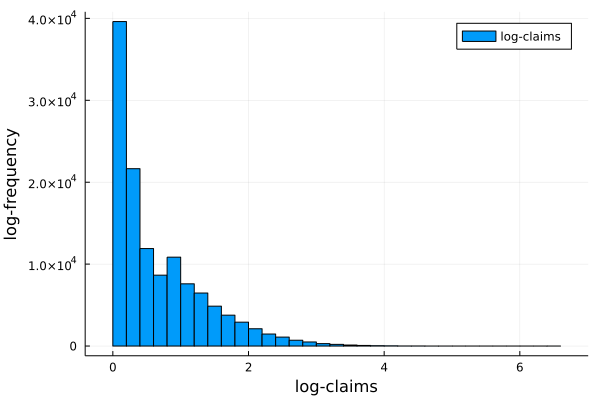

In [9]:
histogram(log.(claims), label = "log-claims", bins = 50)
xaxis!("log-claims")
yaxis!("log-frequency")